<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/A_B_testing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The AB Testing Dataset provided here is a self-generated synthetic dataset created using Random Sampling techniques provided by the Numpy Package. The dataset emulates information regarding visits made by users on an imaginary retail website around the United Kingdom. The users are found to be in two groups, A and B, each of which represents a control group and treatment group respectively. Imagine that the retail company needs to test out a new change on the website which is, "Do people spend time on a website if the website background color is White or Black". This question is asked to achieve the end goal of the analysis which is to improve user engagement, whether it is through a purchase, signing up, etc.

So, in this scenario, let the color 'White' be assigned to Group A which is the default setting for the background color on the website, representing the control group. Also, let the color 'Black' be equivalent to Group B which is the newer setting to be tested. And the main goal is to understand whether there is a significant improvement in website views if the newer setting is applied. This can be answered through the use of A/B Testing.

This dataset is placed to help with practicing A/B Testing as it is a very important topic for Data Analyst prospects. The column description is given as follows:

User ID: Serves as an identifier for each user.

Group: Contains both the control group (A) and treatment group (B).

Page Views: Number of pages the user viewed during their session.

Time Spent: The total amount of time, in seconds, that the user spent on the site during the session.

Conversion: Indicates whether a user has completed a desired action (Yes/No).

Device: Type of device used to access the website.

Location: The country in UK where the user is based in.

The dataset can also be used to derive segment-based insights through appropriate data visualization based on device type and location.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import random

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ab_testing.xlsx to ab_testing.xlsx


In [4]:
df = pd.read_excel("ab_testing.xlsx")
df.head()

,user_id,group,page_views,Time_spent,conversion,device,location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     5000 non-null   int64 
 1   group       5000 non-null   object
 2   page_views  5000 non-null   int64 
 3   Time_spent  5000 non-null   int64 
 4   conversion  5000 non-null   object
 5   device      5000 non-null   object
 6   location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [7]:
df.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace = True)
df

,user_id,group,page_views,Time_spent,conversion,device,location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [8]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df

,user_id,group,page_views,time_spent,conversion,device,location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [9]:
df.drop(columns = ['user_id'],axis=1, inplace = True)
df

,group,page_views,time_spent,conversion,device,location
0,B,3,424,No,Mobile,Northern Ireland
1,A,9,342,No,Mobile,Scotland
2,A,2,396,No,Desktop,Northern Ireland
3,B,4,318,No,Desktop,Wales
4,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...
4995,B,12,313,No,Mobile,Wales
4996,B,10,313,No,Desktop,Northern Ireland
4997,A,11,156,No,Desktop,England
4998,B,13,346,No,Desktop,Wales


In [10]:
df.dtypes

,0
group,object
page_views,int64
time_spent,int64
conversion,object
device,object
location,object


In [11]:
df['converted_int']= df['conversion'].apply(lambda x: 1 if x == 'Yes' else 0)
df

,group,page_views,time_spent,conversion,device,location,converted_int
0,B,3,424,No,Mobile,Northern Ireland,0
1,A,9,342,No,Mobile,Scotland,0
2,A,2,396,No,Desktop,Northern Ireland,0
3,B,4,318,No,Desktop,Wales,0
4,A,1,338,Yes,Desktop,Scotland,1
...,...,...,...,...,...,...,...
4995,B,12,313,No,Mobile,Wales,0
4996,B,10,313,No,Desktop,Northern Ireland,0
4997,A,11,156,No,Desktop,England,0
4998,B,13,346,No,Desktop,Wales,0


In [12]:
df.groupby("group")[["page_views"]].mean()

,page_views
group,
A,7.581580
B,7.492946


In [13]:
df.groupby("group")['time_spent'].mean()

,time_spent
group,
A,241.733227
B,243.303910


In [14]:
# Investigate the elements in each column
for column in df:
  unique_values = np.unique(df[column].astype(str))  # Indented properly
  nr_values = len(unique_values)  # Indented properly
  if len(unique_values) <= 14:
    print("The number of values for feature '{}' is: {}.....{}".format(column, nr_values, unique_values))
  else:
    print("The number of values for feature '{}' is: {}".format(column, nr_values))

The number of values for feature 'group' is: 2.....['A' 'B']
The number of values for feature 'page_views' is: 14.....['1' '10' '11' '12' '13' '14' '2' '3' '4' '5' '6' '7' '8' '9']
The number of values for feature 'time_spent' is: 410
The number of values for feature 'conversion' is: 2.....['No' 'Yes']
The number of values for feature 'device' is: 2.....['Desktop' 'Mobile']
The number of values for feature 'location' is: 4.....['England' 'Northern Ireland' 'Scotland' 'Wales']
The number of values for feature 'converted_int' is: 2.....['0' '1']


In [15]:
df['device'].value_counts()

,count
device,
Desktop,2538
Mobile,2462


In [16]:
df.page_views.value_counts()

,count
page_views,
7,382
10,373
8,365
11,364
4,363
1,361
2,360
12,358
13,358


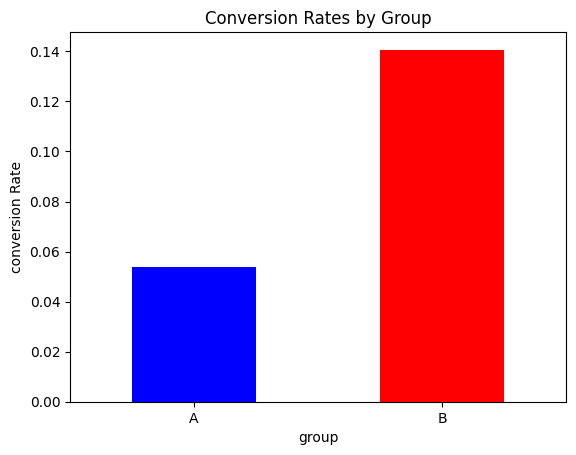

In [17]:
conversion_rates = df.groupby('group')['conversion'].apply(lambda x: (x == 'Yes').mean())
conversion_rates.plot(kind='bar', title='Conversion Rates by Group', color=['blue', 'red'])
plt.ylabel('conversion Rate')
plt.xticks(rotation=0)
plt.show()

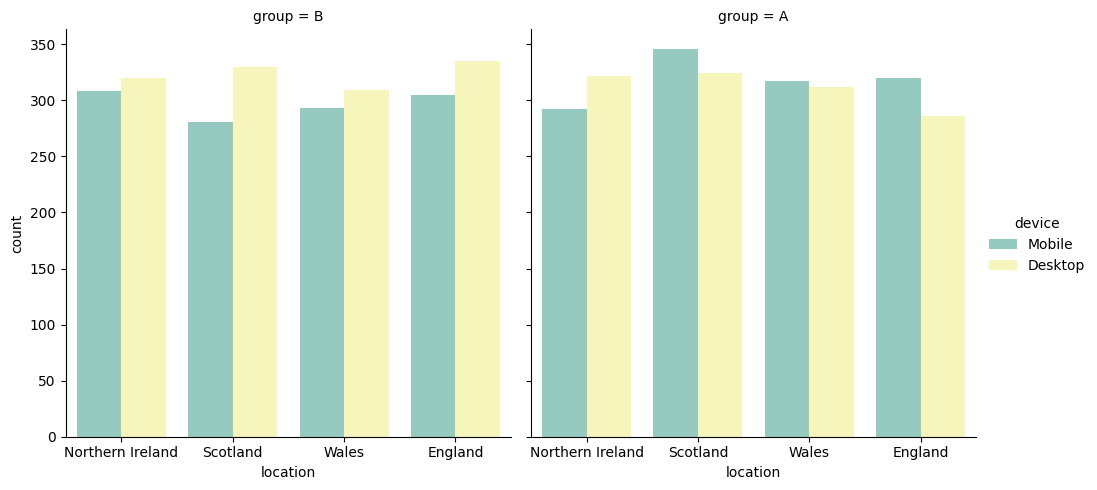

In [18]:
# Looping through all the features by our y variable - see if there is relationship
features = ['location']

# Use catplot instead of countplot for creating subplots based on 'group'
for f in features:
  sns.catplot(x=f, hue='device', data=df, kind='count', palette='Set3', col='group')
  plt.show()

In [19]:
conversion_counts = df.groupby('group')['converted_int'].sum()
sample_sizes = df['group'].value_counts()
conversion_rates = (conversion_counts/sample_sizes)*100
print(f"Conversion Rates:{conversion_rates}")
print(f"\nConversion Counts:{conversion_counts}")
print(f"\nSample Sizes: {sample_sizes}")

Conversion Rates:group
A     5.398968
B    14.066909
dtype: float64

Conversion Counts:group
A    136
B    349
Name: converted_int, dtype: int64

Sample Sizes: group
A    2519
B    2481
Name: count, dtype: int64


CHI-SQUARE TEST

In [20]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['group'], df['conversion'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association that the background color is affecting people's behaviour.")
else:
    print("Fail to reject the null hypothesis: There is no significant association that the background color is affecting people's behaviour.")

Chi-square statistic: 106.22812337440538
P-value: 6.571736018334222e-25
Reject the null hypothesis: There is a significant association that the background color is affecting people's behaviour.
